# For conclusion

In [1]:
using Plots

In [2]:
f(x) = 1/(1+25x^2)

f (generic function with 1 method)

In [3]:
x_points = -1:0.01:1

-1.0:0.01:1.0

In [4]:
y_points = f.(x_points)

201-element Vector{Float64}:
 0.038461538461538464
 0.03921184197627684
 0.03998400639744103
 0.040778876541951274
 0.0415973377703827
 0.042440318302387266
 0.043308791684711995
 0.044203779423140674
 0.04512635379061372
 0.04607764082478977
 ⋮
 0.04512635379061372
 0.044203779423140674
 0.043308791684711995
 0.042440318302387266
 0.0415973377703827
 0.040778876541951274
 0.03998400639744103
 0.03921184197627684
 0.038461538461538464

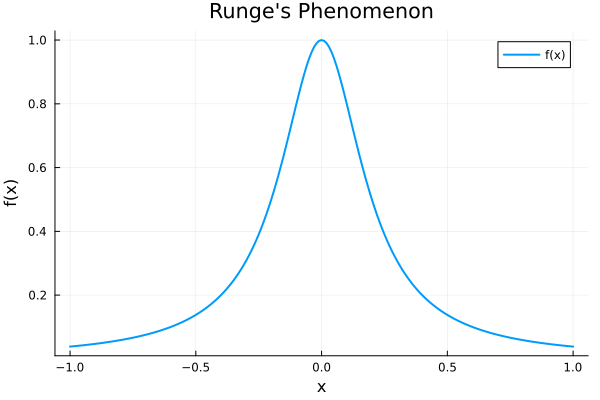

In [5]:
# scatter(x_points, y_points, label="f(x)")
plot(x_points, y_points, label="f(x)", xlabel="x", ylabel="f(x)", title="Runge's Phenomenon", lw=2)

In [6]:
# implement langrange interpolation 

# sum of y_i * l_i(x)
# l_i(x) = product of (x - x_j)/(x_i - x_j) for j != i

l_i(x,i,x_points) = prod([(x - x_points[j])/(x_points[i] - x_points[j]) for j in 1:length(x_points) if j != i])
function langrange_interpolation(x, x_points, y_points)
    sum = 0
    for i in 1:length(x_points)
        sum += y_points[i] * l_i(x,i,x_points)
    end
    return sum
end


langrange_interpolation (generic function with 1 method)

In [7]:
# create a points between a to b with n points with function f
function create_points(f, a, b, n)
    x_points = range(a, b, length=n)
    y_points = f.(x_points)
    return x_points, y_points
end

create_points (generic function with 1 method)

In [8]:
function example(n=5)
    x_points, y_points = create_points(f, -1, 1, n)
    x_interpolation = -1:0.01:1
    y_interpolation = [langrange_interpolation(x, x_points, y_points) for x in x_interpolation]
    scatter!(x_points, y_points, label="points")
    plot!(x_interpolation, y_interpolation, label="$n points")
    
end

example (generic function with 2 methods)

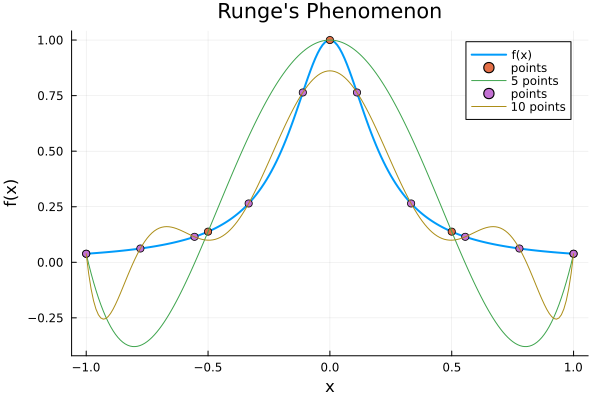

In [9]:
example(5)
example(10)

In [10]:
create_points(f, -1, 1, 5)

(-1.0:0.5:1.0, [0.038461538461538464, 0.13793103448275862, 1.0, 0.13793103448275862, 0.038461538461538464])

In [11]:
function evaluate_h(x)
    h_i = []
    for i in 1:length(x)-1
        h = x[i+1]-x[i]
        push!(h_i, h)
    end
    return h_i
end

function evaluate_slope(data_points)
    m = []
    for i in 1:length(data_points)-1
        slope = (data_points[i+1][2]-data_points[i][2])/(data_points[i+1][1]-data_points[i][1])
        push!(m, slope)
    end
    return m
end

function s(x,data_points,M_i,h_i)
    for i in 1:length(data_points)-1
        if x >= data_points[i][1] && x <= data_points[i+1][1]
            s = M_i[i]*((data_points[i+1][1]-x)^3)/(6*h_i[i]) + M_i[i+1]*((x-data_points[i][1])^3)/(6*h_i[i]) + (data_points[i][2]-M_i[i]*h_i[i]^2/6)*(data_points[i+1][1]-x)/h_i[i] + (data_points[i+1][2]-M_i[i+1]*h_i[i]^2/6)*(x-data_points[i][1])/h_i[i]
            return s
        end
    end

end

function natural_cubic(data_points,xs)      
    x_points = [x for (x,y) in data_points]
    y_points = [y for (x,y) in data_points]

    h_i = evaluate_h(x_points)#
    #slopes 
    slopes = evaluate_slope(data_points)
    #tridiagonal matrix
    u_i = [2*(h_i[i-1]+h_i[i]) for i in 2:length(h_i)]
    v_i = [6*(slopes[i]-slopes[i-1]) for i in 2:length(slopes)] # v_i= i belongs to 1,2,3,4

    no_of_unknows = length(data_points)-2

    A = zeros(no_of_unknows, no_of_unknows)
    b = v_i

    # fill the A matrix with tri-diagonal values of the natural cubic spliney
    for i in 1:no_of_unknows
        A[i, i] = u_i[i]  # Main diagonal
        if i > 1
            A[i, i-1] = h_i[i]  # Lower diagonal
        end
        if i < no_of_unknows
            A[i, i+1] = h_i[i]  # Upper diagonal
        end
    end
    M_i = A\b 
    M_i = [0; M_i; 0]

    y_interpolated = [s(x,data_points,M_i,h_i) for x in xs]
    return y_interpolated
        
end

natural_cubic (generic function with 1 method)

In [14]:
x_range = -1:0.01:1
data_points=[(−1.0,0.0385),(−0.5,0.1379),(0.0,1.0),(0.5,0.1379),(1.0,0.0385),]
# data_points = [(-1.0, 0.038461538461538464), (-0.7777777777777778, 0.06557377049180328), 
# (-0.5555555555555556, 0.11904761904761904), (-0.33333333333333337, 0.21153846153846156), 
# (-0.11111111111111116, 0.35714285714285715), (0.11111111111111116, 0.35714285714285715), 
# (0.33333333333333326, 0.21153846153846156), (0.5555555555555554, 0.11904761904761904), 
# (0.7777777777777777, 0.06557377049180328), (1.0, 0.038461538461538464)]
y_interpolated = natural_cubic(data_points,x_range)

201-element Vector{Float64}:
  0.0385
  0.03366929999999999
  0.02885497142857142
  0.024073385714285696
  0.01934091428571427
  0.01467392857142854
  0.010088799999999967
  0.005601900000000007
  0.0012296000000000043
 -0.0030117285714285694
  ⋮
  0.0012296000000000008
  0.005601900000000007
  0.010088799999999964
  0.014673928571428543
  0.019340914285714265
  0.0240733857142857
  0.028854971428571418
  0.03366929999999999
  0.0385

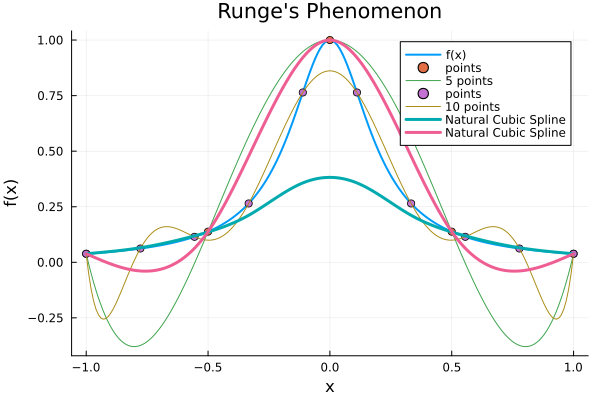

In [15]:
plot!(x_range, y_interpolated, label="Natural Cubic Spline", lw=3)